In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.interpolate as sci

## Parameters for the study

<img src="Fotos/length.png" width="500">
<img src="Fotos/Thickness.png" width="500">
<img src="Fotos/young.png" width="500">

In [45]:
# I choose device 1

L = 6e-6;           # Ribbon Total Length [m]
H = 0.67e-9;        # Ribbon thickness [m]
W = 13.5e-6;        # Ribbon width [m]
A = W*H;            # Cross-section area [m2]
sigma0 = 250e6;     # Tensile stress [Kg/(m·s2)]
E = 0.22e12;        # Young's modulus [kg/(m·s2)]
Iy = A*H**2/12;     # Geometric moment of inertia [m2]. Assuming: Iy = A*H^2/12

f0 = 15e3;          # Resonance frequency [Hz]
m = 1.55e-11;       # Proof Mass [Kg]

x = np.linspace(0,L, num=1000)
x_half = x[0:np.size(x)/2]

# For this part: 
sigma = sigma0;

# Present work (device 1): 1.55 × 10^-11 kg 
# 20 μm × 20 μm × 16.4 μm, the ribbon width is 13.5 μm, and each of the two graphene ribbons is 3 μm long.
# Young’s modulus of 0.22 TPa and a built-in stress in the graphene ribbons of 250 MPa.
# Dont know f0!!
# 14.9 kHz (device 12), 16.2 kHz (device 13), 24.2 kHz (device 14), and 27.2 kHz (device 15)

In [57]:
# I choose device 12

L = 8e-6;           # Ribbon Total Length [m]
H = 0.67e-9;        # Ribbon thickness [m]
W = 8e-6;          # Ribbon width [m]
A = W*H;            # Cross-section area [m2]
sigma0 = 250e6;     # Tensile stress [Kg/(m·s2)]
E = 0.22e12;        # Young's modulus [kg/(m·s2)]
Iy = A*H**2/12;     # Geometric moment of inertia [m2]. Assuming: Iy = A*H^2/12

f0 = 14.9e3;          # Resonance frequency [Hz]
m = 4*1.55e-11;       # Proof Mass [Kg]

x = np.linspace(0,L, num=1000)
x_half = x[0:np.size(x)/2]

# For this part: 
sigma = sigma0;

# Present work (device 1): 1.55 × 10^-11 kg 
# 20 μm × 20 μm × 16.4 μm, the ribbon width is 13.5 μm, and each of the two graphene ribbons is 3 μm long.
# Young’s modulus of 0.22 TPa and a built-in stress in the graphene ribbons of 250 MPa.
# Dont know f0!!
# 14.9 kHz (device 12), 16.2 kHz (device 13), 24.2 kHz (device 14), and 27.2 kHz (device 15)

## 1.1 Vibrational modes without Proof Mass

   \begin{equation}
     U_n(x) = \left\{
	       \begin{array}{ll}
		 \phi_n (x)      & \mathrm{if\ } 0 \leq x \leq L/2 \\
		 (-1)^{n+1} \phi_n (L-x) & \mathrm{if\ } L/2 \leq x \leq L 
	       \end{array}
	     \right.
   \end{equation}
   
$$\phi_n (x) = sin(\beta_{\sigma} x) - \frac{\beta_{\sigma}}{\beta_{E}} [cos(\beta_{\sigma}x)-e^{-\beta_{E}x}]$$


$$\beta_{\sigma} = \frac{n \pi}{L}; \ ~ \ \beta_{E} = \sqrt{\frac{\sigma A}{E I_{y}}}$$


In [58]:
def phi(x, n, L, sigma, A, E, Iy):
    beta_sig = n*np.pi/L;
    beta_E = np.sqrt(sigma*A/(E*Iy));
    phi = np.sin(beta_sig*x)-(beta_sig/beta_E)*(np.cos(beta_sig*x)-np.exp(-beta_E * x))
    return phi

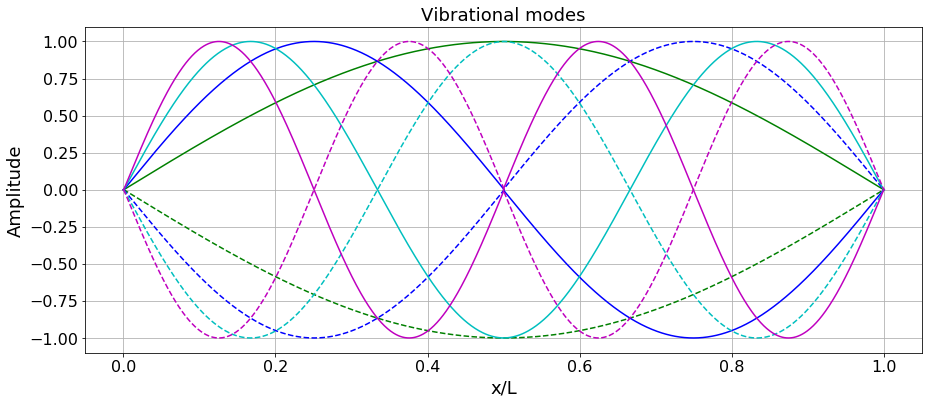

In [59]:
ax = plt.figure(figsize=(15,6))
line_colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']

harmonics = 4;

for n in np.linspace(1,harmonics, num=harmonics):
    wave = phi(x_half, n, L, sigma, A, E, Iy)
    waveform = np.concatenate([wave, wave[::-1]*(-1)**(n+1)])
    plt.plot(x/L, waveform, c = line_colors[int(n)] ,label = 'Mode n= %d' %(n))
    plt.plot(x/L, -waveform, '--', c=line_colors[int(n)])

plt.xlabel('x/L', fontsize=18)
plt.ylabel('Amplitude', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid()
plt.title('Vibrational modes', fontsize=18)
plt.show()

## 1.2 Considering the Proof Mass

From the Supplementary material:

$$F = \Big[16 \frac{EWH^3}{L^3} + 4\frac{T}{L}\Big]Z$$

The built-in stress:

$$\sigma_{0} = \frac{L}{4WH} \Big[(2\pi f_{0})^2 m - \frac{16EWH^3}{L^3}\Big]$$

The average strain in the graphene ribbons:

$$\epsilon = \frac{2 Z^2}{L^2} = \frac{2(Z_0 + Z_{acc})^2}{L^2} \approx \frac{F^2}{8 \sigma_0^2 W^2 H^2}$$

Z0 is the offset deflection from the earth gravitation and Zacc is the displacement from the acceleration.

Relation between average strain and average stress:

$$\delta \sigma = \epsilon \cdot E \approx \frac{F^2 \cdot E}{8 \sigma_0^2 W^2 H^2}$$

$$\sigma = \sigma_0 + \delta \sigma$$

<!---
sigma0 = L/(4*W*H)*(m*(2*np.pi*f0)**2-16*E*W*H**3/L**3)
#sigma0 = 100e8;
epsilon = F**2/(8*(sigma0*W*H)**2)
sigma_avg = epsilon*E
-->

## 1.2.1 Effect in resonant frequency
Here the obtained expression was $\delta f_R/f_R$ and not $\delta f_R/f_0$!!

$$f_R = \frac{1}{2 \pi} \sqrt{\frac{K}{m}} \ ~ \ and \ ~ \ K = \Big[16 \frac{EWH^3}{L^3} + 4\frac{\sigma W H}{L}\Big]$$

$$\frac{\delta f_R}{f_R} = \frac{1}{2} \frac{d K}{K} = \frac{1}{2} \frac{4 \frac{WH}{L} \delta \sigma}{\Big[16 \frac{EWH^3}{L^3} + 4\frac{\sigma W H}{L}\Big]}$$

As $\sigma = \sigma_0 + \delta \sigma$:

$$\frac{\delta f_R}{f_R} = \frac{1}{2} \frac{4 \frac{WH}{L} \delta \sigma}{\Big[16 \frac{EWH^3}{L^3} + 4\frac{\sigma_0 W H}{L} + 4\frac{\delta \sigma W H}{L}\Big]}$$

As seen in 1.2:

$$\delta \sigma = \epsilon \cdot E \approx \frac{F^2 \cdot E}{8 \sigma_0^2 W^2 H^2}$$

Joining together:

$$\frac{\delta f_R}{f_R} = \frac{1}{2} \frac{F^2 E L^2}{32 \sigma_0^2 W^2 H^4 E + 8\sigma_0^3 W^2 H^2 L^2 + F^2 E L^2}$$

As: $F = m a$

$$\frac{\delta f_R}{f_R} = \frac{1}{2} \frac{(m a)^2 E L^2}{32 \sigma_0^2 W^2 H^4 E + 8\sigma_0^3 W^2 H^2 L^2 + (m a)^2 E L^2}$$

The $\sigma_0$ is simplified and substituted:

$$\sigma_{0} = \frac{L}{4WH} \Big[(2\pi f_{0})^2 m - \frac{16EWH^3}{L^3}\Big]\approx \frac{L}{4WH}(2\pi f_{0})^2 m; \ ~ \ \Big(\frac{H}{L}\Big)^3 \rightarrow 0$$


Substituting in the previous expression:

$$\frac{\delta f_R}{f_R} = \frac{4 E a^2}{16 (2\pi f_0)^4 H^2 E + L^3 (2\pi f_0)^6 m + 8 E a^2}$$

Naming: $w_0 = 2\pi f_0$ 

$$\frac{\delta f_R}{f_R} = \frac{4 E a^2}{16 w_0^4 H^2 E + L^3 w_0^6 m + 8 E a^2}$$

In [60]:
def df_function(E, f0, H, L, m, a):
    df_f = (4*E*a**2)/(16*(2*np.pi*f0)**4*H**2*E + L**3*(2*np.pi*f0)**6*m)
    return df_f

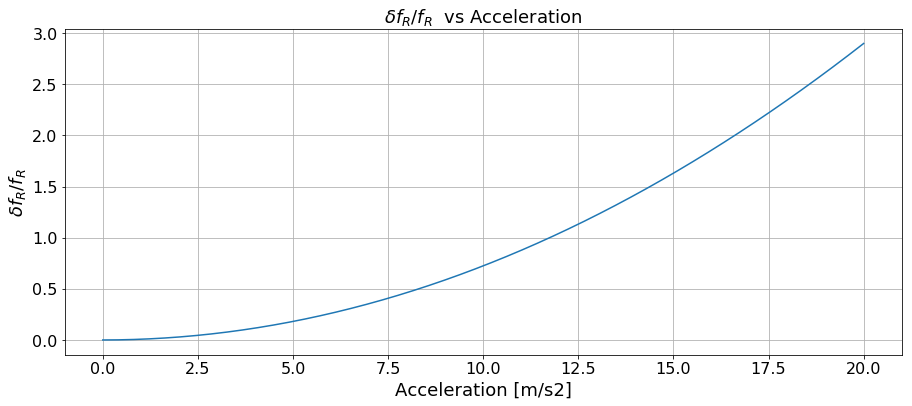

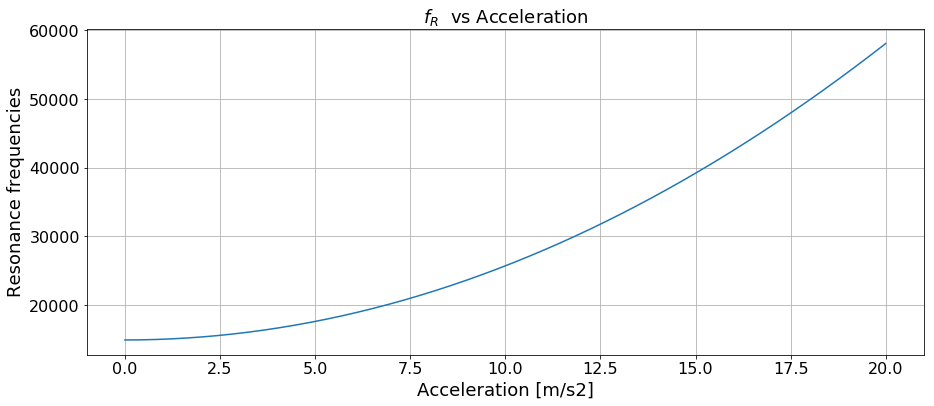

In [61]:
a_vector = np.linspace(0,20)
df_f_vector = df_function(E, f0, H, L, m, a_vector)

plt.figure(figsize=(15,6))
plt.plot(a_vector, df_f_vector)
plt.xlabel('Acceleration [m/s2]', fontsize=18)
plt.ylabel('$\delta f_R /f_R$', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid()
plt.title('$\delta f_R /f_R$  vs Acceleration', fontsize=18)

plt.show()

frequencies = df_f_vector*f0+f0

plt.figure(figsize=(15,6))
plt.plot(a_vector, frequencies)
plt.xlabel('Acceleration [m/s2]', fontsize=18)
plt.ylabel('Resonance frequencies', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid()
plt.title('$f_R$  vs Acceleration', fontsize=18)
plt.show()

## Effect in resonant frequency - 2nd time:

Now the expression obtained will be the one we are targetting: $\delta f_R/f_0$


$$f_R = \frac{1}{2 \pi} \sqrt{\frac{K}{m}} \ ~ \ and \ ~ \ K = \Big[16 \frac{EWH^3}{L^3} + 4\frac{\sigma W H}{L}\Big] \approx K = 4\frac{\sigma W H}{L}$$

$$\sigma = \sigma_0 + \delta \sigma$$

$$\sigma_{0} = \frac{L}{4WH} \Big[(2\pi f_{0})^2 m - \frac{16EWH^3}{L^3}\Big]\approx \frac{L}{4WH}(2\pi f_{0})^2 m; \ ~ \ \Big(\frac{H}{L}\Big)^3 \rightarrow 0$$

$$\delta \sigma = \epsilon \cdot E \approx \frac{F^2 \cdot E}{8 \sigma_0^2 W^2 H^2}$$

Putting all together:

$$f_R = \frac{1}{2\pi} \sqrt{(2\pi f_0)^2 + \frac{E \cdot m}{2 \sigma_0^2 WHL} a^2}$$

$$R(a) = \frac{\partial f_R / f_0}{\partial a} = \frac{1}{4\pi} \frac{1}{f_0 \sqrt{(2\pi f_0)^2 + \frac{E m}{2 \sigma_0^2 W H L}a^2}} \cdot \frac{E m}{\sigma_0^2 W H L} a = \frac{8 W H E a}{(2\pi f_0)^3 L^2 \sqrt{(2\pi f_0)^6 L^2 m^2 + 8 EWHma^2}}$$

The last one can be simplified to (This expression was double checked):

$$R(a) = \frac{\partial f_R / f_0}{\partial a} = \frac{8 WHE}{(2\pi f_0)^6 L^3 m} a$$ 

$$\frac{\Delta f_R}{f_0} = \frac{1}{2\pi f_0} \sqrt{(2\pi f_0)^2+\frac{E m}{2 \sigma_0^2 W H L} a^2}-1 = \sqrt{1+\frac{E m}{2 (2\pi)^2 \sigma_0^2 W H L f_0^2} a^2}-1$$

$$\frac{\Delta f_R}{f_0} = \sqrt{1 + \frac{8E W H a^2}{(2\pi f_0)^6 L^3 m}} - 1$$

In [62]:
def df_function2(E, f0, H, L, m, a):
    df_f = np.sqrt(1+(8*E*W*H*a**2)/((2*np.pi*f0)**6*L**3*m))-1
    return df_f

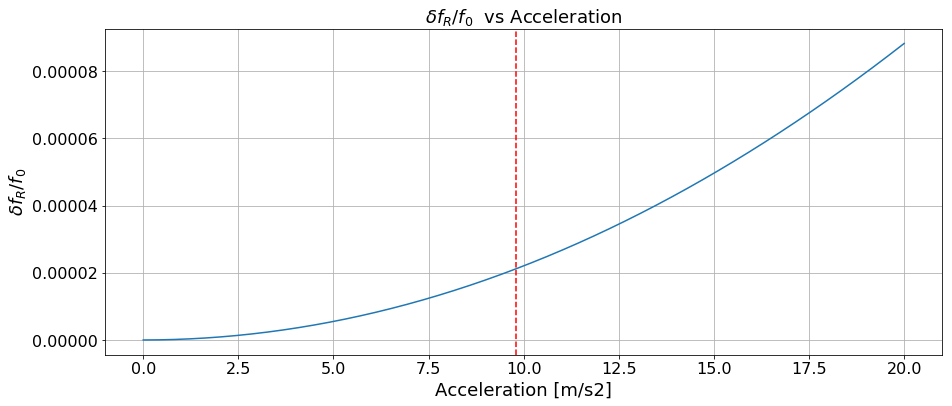

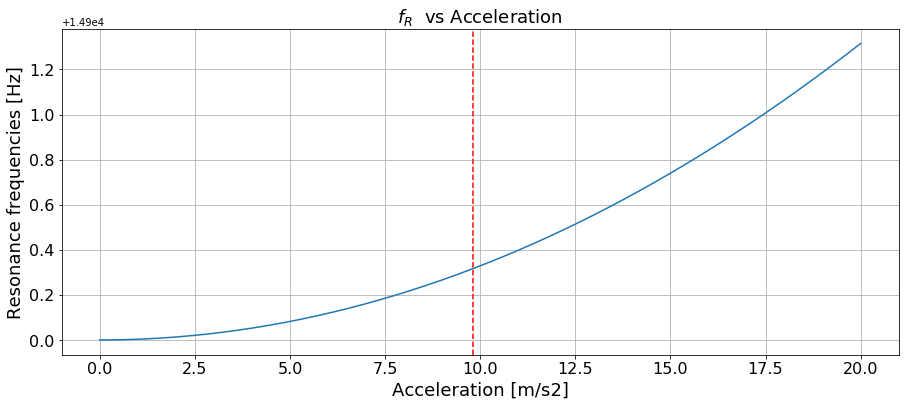

In [63]:
a_vector = np.linspace(0,20)
df_f_vector = df_function2(E, f0, H, L, m, a_vector)

plt.figure(figsize=(15,6))
plt.plot(a_vector, df_f_vector)
plt.xlabel('Acceleration [m/s2]', fontsize=18)
plt.ylabel('$\delta f_R /f_0$', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid()
plt.axvline(x=9.81, ls='--', c='r')
plt.title('$\delta f_R /f_0$  vs Acceleration', fontsize=18)
plt.show()

frequencies = df_f_vector*f0+f0

plt.figure(figsize=(15,6))
plt.plot(a_vector, frequencies)
plt.axvline(x=9.81, ls='--', c='r')
plt.xlabel('Acceleration [m/s2]', fontsize=18)
plt.ylabel('Resonance frequencies [Hz]', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid()
plt.title('$f_R$  vs Acceleration', fontsize=18)
plt.show()

In [64]:
def R_FOM(E, W, f0, H, L, m, a):
    R = 8*W*H*E*a/((2*np.pi*f0)**6*L**3*m)
    return R

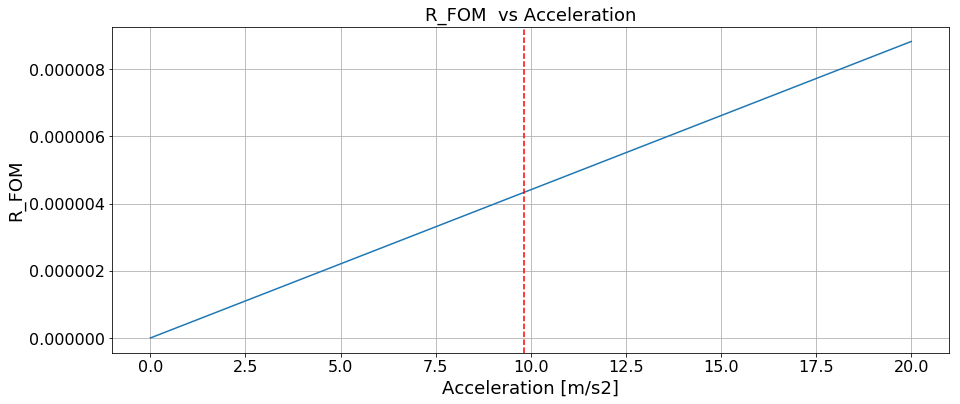

In [65]:
a_vector = np.linspace(0,20)
R_FOM_vector = R_FOM(E, W, f0, H, L, m, a_vector)

plt.figure(figsize=(15,6))
plt.plot(a_vector, R_FOM_vector)
plt.xlabel('Acceleration [m/s2]', fontsize=18)
plt.ylabel('R_FOM', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('R_FOM  vs Acceleration', fontsize=18)
plt.grid()
plt.axvline(x=9.81, ls='--', c='r')
plt.show()


FOM that we want to obtain:

$$R(a) = \frac{\partial f_R / f_0}{\partial a}$$

From a wisely chosen Taylor expansion...

$$\partial f_R / f_0 ~ (a-g) = \partial f_R / f_0 ~ (g) + \frac{\partial (\partial f_R / f_0)(g)}{\partial a} (a-g) + \frac{1}{2}\frac{\partial^2 (\partial f_R / f_0)(g)}{\partial a^2} (a-g)^2 + O(3)$$

Where $a$ is the acceleration affecting the device at every moment. $g$ is the Earth gravity.

We'll stop in the first order:
$$\partial f_R / f_0 ~ (a-g) = \frac{\partial (\partial f_R / f_0)(g)}{\partial a} (a-g) + O(2)$$

Taylor expansion will only tell us that we can pick the derivative at a = 1g and keep it as constant for the neighbourhood of g.

$$R(g) = \frac{\partial f_R / f_0}{\partial a} = \frac{8 WHE}{(2\pi f_0)^6 L^3 m} g = 6.65~\cdot 10^{-5} ~(m/s^2)^{-1}$$ 

In other units:

$$R(g) = 6.65~\cdot 10^{-5} ~(m/s^2)^{-1} \cdot ~9.81 = 652.37~ ppm/g$$

## Effect in resonant frequency - 3nd time:

Now the expression obtained will be: $\delta f_R/f_{gravity}$ and the Taylor expansion will be done around the value of a=g.

No me convence que se separe las contribuciones de la gravedad y de la acceleración exterior.

$$f_R = \frac{1}{2 \pi} \sqrt{\frac{K}{m}} \ ~ \ and \ ~ \ K = \Big[16 \frac{EWH^3}{L^3} + 4\frac{\sigma W H}{L}\Big] \approx K = 4\frac{\sigma W H}{L}$$

$$\sigma = \sigma_0 + \sigma_g + \delta \sigma$$

$$\sigma_{0} = \frac{L}{4WH} \Big[(2\pi f_{0})^2 m - \frac{16EWH^3}{L^3}\Big]\approx \frac{L}{4WH}(2\pi f_{0})^2 m; \ ~ \ \Big(\frac{H}{L}\Big)^3 \rightarrow 0$$

$$\delta \sigma = \epsilon \cdot E \approx \frac{F^2 \cdot E}{8 \sigma_0^2 W^2 H^2}$$

Putting all together:

$$f_R = \frac{1}{2\pi} \sqrt{(2\pi f_0)^2 + \frac{E \cdot m}{2 \sigma_0^2 WHL} a^2} \rightarrow f_R(g) = \frac{1}{2\pi} \sqrt{(2\pi f_0)^2 + \frac{E \cdot m}{2 \sigma_0^2 WHL} g^2}$$

$$\frac{\partial f_R}{\partial a} = \frac{1}{4\pi} \frac{1}{ \sqrt{(2\pi f_0)^2 + \frac{E m}{2 \sigma_0^2 W H L}a^2}} \cdot \frac{E m}{\sigma_0^2 W H L} a $$

$$FOM = \frac{1}{f_R(g)} \frac{\partial f_R}{\partial a}\Big|_g = \frac{8WHEg}{L^3 (2\pi f_0)^6 m + 8WHEg^2}$$ 

In [66]:
def R_FOM(E, W, f0, H, L, m, g):
    R = 8*W*H*E*g/((2*np.pi*f0)**6*L**3*m + 8*W*H*E*g**2)
    return R

--------------------------------------------------------------------------
## Reminder:

Keep in mind that the K comes from:

$$K = \frac{E I}{L^3} \int_{0}^{1} \Phi''^{2}(\xi) d \xi + \frac{\sigma WH}{L} \int_{0}^{1} \Phi'^{2}(\xi) d \xi$$

Considering $I = \frac{W H^3}{12}$, from the study:

$$\frac{1}{12} \int_{0}^{1} \Phi '' ^{2}(\xi) d \xi = 16$$

$$\frac{1}{12} \int_{0}^{1} \Phi ' ^{2}(\xi) d \xi = 4$$

--------------------------------------------------------------------------

## Analytical Re-study

$$w_o^2 = \frac{\frac{4WH}{L} \sigma_0 + \frac{16EWH^3}{L^3}}{m}$$

## THE WHOLE STUDY (MEMBRANES) -- ONLY considering the linear part


Model from Book Senturia $$P =  \Big(C_r \Big[ \frac{\sigma_0 H}{L^2} \Big] + C_b \Big[ \frac{E H^3}{(1-\nu^2)L^4} \Big] \Big) Z + C_s \cdot f_s(\nu) \Big[ \frac{EH}{(1-\nu) L^4}\Big]Z^3$$

We take the linear part, and assume that: $P = F/L^2$

$$F =  L^2 \Big(C_r \Big[ \frac{\sigma_0 H}{L^2} \Big] + C_b \Big[ \frac{E H^3}{(1-\nu^2)L^4} \Big] \Big) Z$$

We will work with K:

$$K =  C_r \Big[ \sigma_0 H \Big] + C_b \Big[ \frac{E H^3}{(1-\nu^2)L^2} \Big] = (2\pi f_0)^2 m$$

From here we extract the first useful equation:


$$\rightarrow \Big\{\sigma_{0} = \frac{1}{C_r H} \Big[(2\pi f_{0})^2 m - \frac{C_b EH^3}{(1-\nu^2)L^2}\Big] \Big\} \leftarrow$$

and

$$\rightarrow \Big\{f_{0} = \frac{1}{2 \pi} \sqrt{C_r \sigma \frac{H}{m} + \frac{C_b EH^3}{m(1-\nu^2)L^2}} \Big\} \leftarrow$$

The $\delta \sigma$ created by the acceleration:

$$\delta \sigma = \epsilon E = \frac{2 Z^2}{L^2} E$$

In here we will input $F = K \cdot Z$:

$$\delta \sigma = \frac{2 F^2}{K^2 L^2} E = \frac{2 E F^2}{\Big[C_r  \sigma_0 H  + C_b \frac{E H^3}{(1-\nu^2)L^2}\Big]^2  L^2} = \frac{2 E m^2 a^2}{\Big[C_r  \sigma_0 H  + C_b \frac{E H^3}{(1-\nu^2)L^2}\Big]^2  L^2}$$

Now...

$$f_R = \frac{1}{2\pi} \sqrt{\frac{K}{m}} \Longleftarrow  K = C_r ( \sigma_0 + \delta \sigma)H + C_b \Big[ \frac{E H^3}{(1-\nu^2)L^2} \Big] \Longleftarrow \delta \sigma = \frac{2 E m^2 a^2}{\Big[C_r  \sigma_0 H  + C_b \frac{E H^3}{(1-\nu^2)L^2}\Big]^2  L^2}$$

With this expression, we can calculate the FOM

$$FOM = \frac{1}{f_R(g)} \frac{\partial f_R}{\partial a}\Big|_g = \frac{2 Em^2 g C_r H}{2 E m^2 g^2 C_r H + \Big(C_r \sigma_0 H + C_b \frac{E H^3}{(1-\nu^2)L^2}\Big)^3 L^2}$$

For low $\sigma_0$:

$$FOM_{\sigma \rightarrow 0} = \frac{2 Em^2 g C_r H}{2 E m^2 g^2 C_r H +  \Big( C_b \frac{E H^3}{(1-\nu^2)L^2}\Big)^3 L^2} \neq \frac{1}{g}$$

Which relation should C_r and C_b have to obtain a certain FOM = alpha value at sigma0 => 0:

$$C_r = C_b^3 \frac{\alpha E^2 H^8}{(1-\nu^2)^3 L^4 2 m^2 g (1-\alpha g)}$$ 


## THE WHOLE STUDY (MEMBRANES) -- Considering nonlinear terms too

Model from Book Senturia $$P =  \Big(C_r \Big[ \frac{\sigma_0 H}{L^2} \Big] + C_b \Big[ \frac{E H^3}{(1-\nu^2)L^4} \Big] \Big) Z + C_s \cdot f_s(\nu) \Big[ \frac{EH}{(1-\nu^2) L^4}\Big]Z^3$$

We re-arrange terms to have the nonlinear term inside Z, and $C_s \cdot f_s(\nu) \equiv C_s$


$$P = \frac{C_r H}{L^2} \Big(\sigma_0 + \frac{C_b}{C_r} \Big[ \frac{E H^2}{(1-\nu^2)L^2} \Big] + \frac{C_s}{C_r} \Big[ \frac{E}{(1-\nu^2) L^2}\Big]Z^2 \Big) \cdot Z$$

$$F = C_r H \Big(\sigma_0 + \frac{C_b}{C_r} \Big[ \frac{E H^2}{(1-\nu^2)L^2} \Big] + \frac{C_s}{C_r} \Big[ \frac{E}{(1-\nu^2) L^2}\Big]Z^2 \Big) \cdot Z$$


Calculate the frequency associated:

$$C_r H \Big(\sigma_0 + \frac{C_b}{C_r} \Big[ \frac{E H^2}{(1-\nu^2)L^2} \Big] + \frac{C_s}{C_r} \Big[ \frac{E}{(1-\nu^2) L^2}\Big]Z^2 \Big) = (2 \pi f_o)^2 m$$


$$f_o = \frac{1}{2\pi} \sqrt{\frac{C_r H}{m} \Big[\sigma_0 + \frac{C_b}{C_r} \frac{E H^2}{(1-\nu^2) L^2} + \frac{C_s}{C_r} \frac{E}{(1-\nu^2)L^2} Z^2 \Big]}$$

Here the displacement can be extracted from the same F = k Z equation:

$$Z = \frac{m \cdot a}{C_r H \Big[\sigma_0 + \frac{C_b}{C_r} \Big[ \frac{E H^2}{(1-\nu^2)L^2} \Big] + \frac{C_s}{C_r} \Big[ \frac{E}{(1-\nu^2) L^2}\Big]Z^2 \Big]} \rightarrow \text{Solved with Newton-Raphson for every case}$$

The FOM will be calculated using a numerical approach:

$$FOM = \frac{1}{f_R(g)}\frac{f_R(g + \Delta a)-f_R(g)}{\Delta a}$$

## LETME TRY SOMETHING...

Model from Book Senturia $$P =  \Big(C_r \Big[ \frac{\sigma_0 H}{L^2} \Big] + C_b \Big[ \frac{E H^3}{(1-\nu^2)L^4} \Big] \Big) Z + C_s \cdot f_s(\nu) \Big[ \frac{EH}{(1-\nu^2) L^4}\Big]Z^3$$

We re-arrange terms to have the nonlinear term inside Z, and $C_s \cdot f_s(\nu) \equiv C_s$


$$P = \frac{C_r H}{L^2} \Big(\sigma_0 + \frac{C_b}{C_r} \Big[ \frac{E H^2}{(1-\nu^2)L^2} \Big] + \frac{C_s}{C_r} \Big[ \frac{E}{(1-\nu^2) L^2}\Big]Z^2 \Big) \cdot Z$$

$$P = \frac{F}{Area} = \frac{F}{2\cdot \frac{W}{\sqrt{\pi}} \frac{L}{2} + \big(\frac{L}{2}\big)^2 }$$

$$F = Area \cdot \frac{C_r H}{L^2} \Big(\sigma_0 + \frac{C_b}{C_r} \Big[ \frac{E H^2}{(1-\nu^2)L^2} \Big] + \frac{C_s}{C_r} \Big[ \frac{E}{(1-\nu^2) L^2}\Big]Z^2 \Big) \cdot Z$$


Calculate the frequency associated:

To extract the $k = \frac{d F}{d x}$:

$$K = \frac{d F}{d x} = Area \cdot \frac{C_r H}{L^2} \Big(\sigma_0 + \frac{C_b}{C_r} \Big[ \frac{E H^2}{(1-\nu^2)L^2} \Big] + \frac{3\cdot C_s}{C_r} \Big[ \frac{E}{(1-\nu^2) L^2}\Big]Z^2 \Big)$$

$$Area \cdot \frac{C_r H}{L^2} \Big(\sigma_0 + \frac{C_b}{C_r} \Big[ \frac{E H^2}{(1-\nu^2)L^2} \Big] + \frac{3 \cdot C_s}{C_r} \Big[ \frac{E}{(1-\nu^2) L^2}\Big]Z^2 \Big) = (2 \pi f_o)^2 m$$


$$f_o = \frac{1}{2\pi} \sqrt{\frac{Area \cdot C_r H}{m L^2} \Big[\sigma_0 + \frac{C_b}{C_r} \frac{E H^2}{(1-\nu^2) L^2} + \frac{3 \cdot C_s}{C_r} \frac{E}{(1-\nu^2)L^2} Z^2 \Big]}$$

Here the displacement can be extracted from the same F = k Z equation:

$$Z = \frac{m \cdot a}{Area \cdot \frac{C_r H}{L^2} \Big[\sigma_0 + \frac{C_b}{C_r} \Big[ \frac{E H^2}{(1-\nu^2)L^2} \Big] + \frac{3C_s}{C_r} \Big[ \frac{E}{(1-\nu^2) L^2}\Big]Z^2 \Big]} \rightarrow \text{Solved with Newton-Raphson for every case}$$

The FOM will be calculated using a numerical approach:

$$FOM = \frac{1}{f_R(g)}\frac{f_R(g + \Delta a)-f_R(g)}{\Delta a}$$